In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature
import numpy as np
import pandas as pd

In [3]:
3X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, hypercube=False, class_sep=10, random_state=41)

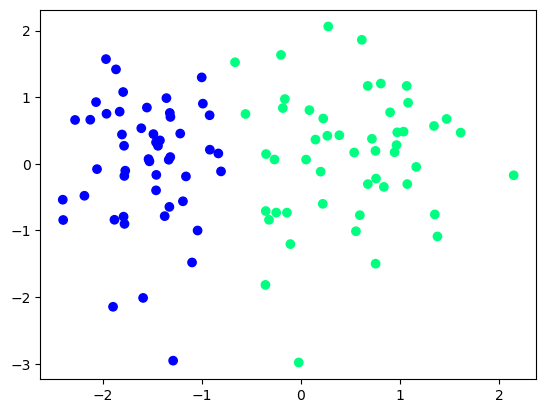

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [31]:
def perceptron(X, y, epochs, lr):
    X = add_dummy_feature(X)
    weights = np.ones(X.shape[1])

    for _ in range(epochs):
        j = np.random.randint(X.shape[0])
        y_hat = step(np.dot(X[j], weights))
        weights = weights + (lr * (y[j] - y_hat) * X[j])

    return weights[0], weights[1:]

def step(z):
    return 0 if z < 0 else 1

In [37]:
intercept_, coef_ = perceptron(X, y, epochs=1000, lr=0.1)

In [38]:
intercept_, coef_

(0.9, array([1.41655672, 0.15709606]))

In [39]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

x_inp = np.linspace(-3, 3, 100)
y_inp = m * x_inp + b

(-3.0, 3.0)

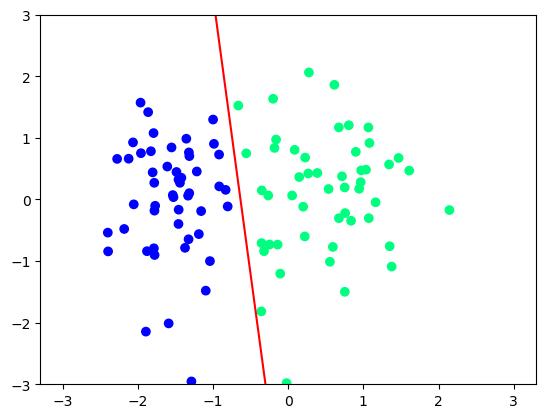

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.plot(x_inp, y_inp, 'r-')
plt.ylim(-3, 3)